In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [2]:
clean_permit = pd.read_pickle('clean/permit.pickle')
clean_violation = pd.read_pickle('clean/violation.pickle') 
clean_crime = pd.read_pickle('clean/crime.pickle')
clean_311 = pd.read_pickle('clean/311.pickle')
def cut_date(df):
    return df[df.date.map(lambda x: x.year)>=2005]
clean_permit, clean_violation, clean_crime, clean_311 = map(cut_date,[clean_permit, clean_violation, clean_crime, clean_311])

In [3]:
clusters = pd.read_csv('clean/cluster.csv')[['lat','lng']]
clusters

,lat,lng
0,0.781419,0.409348
1,0.563567,0.250641
2,0.747807,0.751726
3,0.356198,0.451111
4,0.910796,0.067893
5,0.678484,0.134470
6,0.448514,0.195646
7,0.951783,0.201994
8,0.844796,0.558007
9,0.975175,0.904702


In [4]:
nbrs = NearestNeighbors(n_neighbors=1).fit(clusters)

In [5]:
def find_nearest(df):
    distances, indices = nbrs.kneighbors(df[['lat','lng']])
    df['neighbor'] = indices
    return df

In [8]:
clean_permit = find_nearest(clean_permit)
tmp = clean_permit.groupby('neighbor').count().sort_values('lat')
tmp

,lat,lng,date,addr
neighbor,,,,
4836,1,1,1,1
4134,1,1,1,1
4130,1,1,1,1
4128,1,1,1,1
4124,1,1,1,1
7827,1,1,1,1
7830,1,1,1,1
7841,1,1,1,1
4098,1,1,1,1


# Top permit

In [21]:
def plot_permit(sorted_permit,top=10):
    idx = sorted_permit.index
    fig, ax=plt.subplots(figsize=(16,8))
    ax.scatter(*zip(*clusters.values),color="y")
    ax.scatter(*list(clusters.ix[idx[-1]]),color="b")
    for i in idx[-top:-1]:
        ax.scatter(*list(clusters.ix[i]),color="r")
    return ax

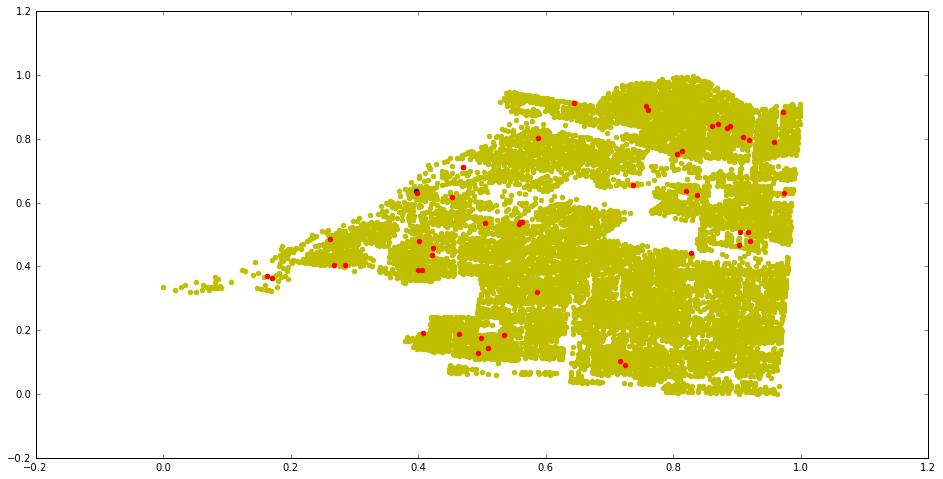

In [22]:
plot_permit(tmp,top=50)